# Práctica 1: Primeros pasos con OpenCV

Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

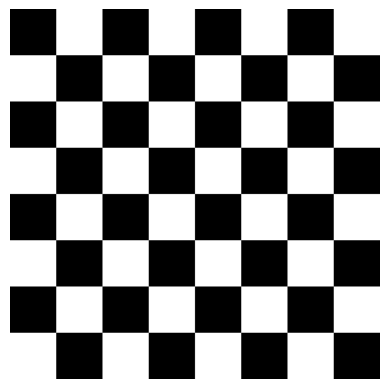

In [3]:
# Size of the chessboard
width = 800
height = 800

# Number of squares
n_squares = 8

# Size of the square
square_size = width // n_squares

# Create a single-plane image (white)
chessboard = np.ones((height, width), dtype=np.uint8) * 255

# Draw black squares in even positions: (0,0) (2,0) (4,0) (6,0) (8,0)
for i in range(0, height, square_size):
    for j in range(0, width, square_size):
        if (i // square_size + j // square_size) % 2 == 0:
            chessboard[i:i+square_size, j:j+square_size] = 0

# Show the image
plt.imshow(chessboard, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

## TAREA 2: Crear una imagen estilo Mondrian

## TAREA 3: Utilización de las funciones de dibujo de OpenCV

## TAREA 4: Modifica de forma libre los valores de un plano de la imagen

## TAREA 5: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

## TAREA 6: Elaboración de una propuesta pop art utilizando la entrada de la cámara web o vídeo